# Plotting

There are several plotting modules in python. Matplolib is the most complete/versatile package for all 2D plotting. The easiest way to construct a new plot is to have a look at http://matplotlib.org/gallery.html and get inspiration from the available examples. The official documentation can be found at: http://matplotlib.org/contents.html

## Quick plots, or Matplotlib dirty usage

In [ ]:
%matplotlib

import numpy as np
import matplotlib.pyplot as plt

# To get interactive plotting (otherwise you need to 
# type plt.show() at the end of the plotting commands)
plt.ion() 

x = np.linspace(0, 10)
y = np.sin(x)

# basic X/Y line plotting with '--' dashed line and linewidth of 2
plt.plot(x, y, '--', label='first line')

# overplot a dotted line on the previous plot
plt.plot(x, np.cos(x)*np.cos(x/2), '.', linewidth=3, label='other') 

x_axis_label = plt.xlabel('x axis') #change the label of the xaxis

In [ ]:
# change your mind about the label : you do not need to replot everything !
plt.xlabel('another x axis')

In [ ]:
# or you can use the re-tuned object
x_axis_label.set_text('changed it from the object itself')

In [ ]:
# simply add the legend (from the previous label)
legend = plt.legend()        

In [ ]:
plt.savefig('plot.png') # save the current figure in png
plt.savefig('plot.eps') # save the current figure in ps, no need to redo it !

In [ ]:
!ls

## Proper use of Matplotlib (object oriented)

We will use interactive plots inline in the notebook. This feature is enabled through:

In [ ]:
%matplotlib notebook

<IPython.core.display.Javascript object>


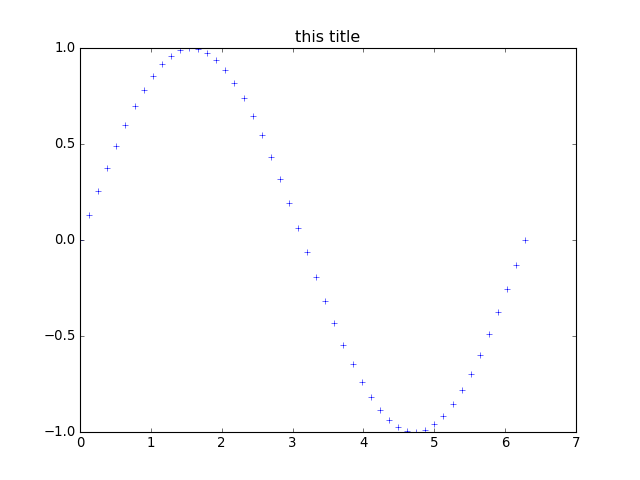

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# define a figure which can contains several plots, you can define resolution and so on here...
fig2 = plt.figure()

# add one axis, axes are actual plots where you can put data.fits (nx, ny, index)
ax = fig2.add_subplot(1, 1, 1)

Add a cruve with a title to the plot

In [10]:
x = np.linspace(0, 2*np.pi)
ax.plot(x, np.sin(x), '+')
ax.set_title('this title')
plt.show()

<IPython.core.display.Javascript object>


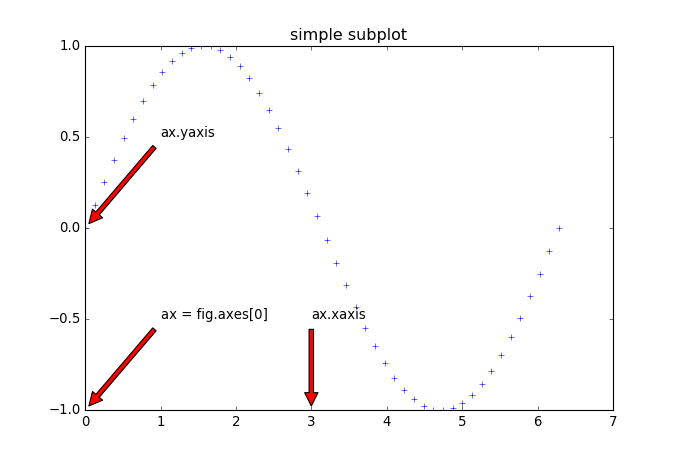

In [16]:
# is a simpler syntax to add one axis into the figure (we will stick to this)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '+')
ax.set_title('simple subplot')

A long list of markers can be found at http://matplotlib.org/api/markers_api.html
as for the colors, there is a nice discussion at http://stackoverflow.com/questions/22408237/named-colors-in-matplotlib

All the components of a figure can be accessed throught the 'Figure' object

In [ ]:
print(type(fig))

In [ ]:
print(dir(fig))

In [ ]:
print(fig.axes)

In [12]:
print('This is the x-axis object', fig.axes[0].xaxis)
print('And this is the y-axis object', fig.axes[0].yaxis)

This is the x-axis object XAxis(80.000000,48.000000)
And this is the y-axis object YAxis(80.000000,48.000000)


In [17]:
# arrow pointing to the origin of the axes
ax_arrow = ax.annotate('ax = fig.axes[0]',
                       xy=(0, -1),              # tip of the arrow
                       xytext=(1, -0.5),         # location of the text
                       arrowprops={'facecolor':'red', 'shrink':0.05})

# arrow pointing to the x axis
x_ax_arrow = ax.annotate('ax.xaxis',
                         xy=(3, -1),              # tip of the arrow
                         xytext=(3, -0.5),         # location of the text
                         arrowprops={'facecolor':'red', 'shrink':0.05})
xax = ax.xaxis

# arrow pointing to the y axis
y_ax_arrow = ax.annotate('ax.yaxis',
                         xy=(0, 0),              # tip of the arrow
                         xytext=(1, 0.5),         # location of the text
                         arrowprops={'facecolor':'red', 'shrink':0.05})


Add a labels to the x and y axes

In [14]:
# add some ascii text label
# this is equivelant to:
#     ax.set_xlabel('x')
xax.set_label_text('x')

# add latex rendered text to the y axis
ax.set_ylabel('$sin(x)$', size=20, color='g', rotation=0)

Finally dump the figure to a png file

In [15]:
fig.savefig('myplot.png')
!ls
!eog myplot.png

01-Introduction.ipynb  03-Plotting.ipynb  __pycache__
02-Numpy.ipynb	       myplot.png
/bin/sh: 1: eog: not found


Lets define a function that creates an empty base plot to which we will add
stuff for each demonstration. The function returns the figure and the axes object.

In [20]:
def create_base_plot():
    fig, ax = plt.subplots()
    ax.set_title('sample figure')
    return fig, ax

## Log plots

<IPython.core.display.Javascript object>


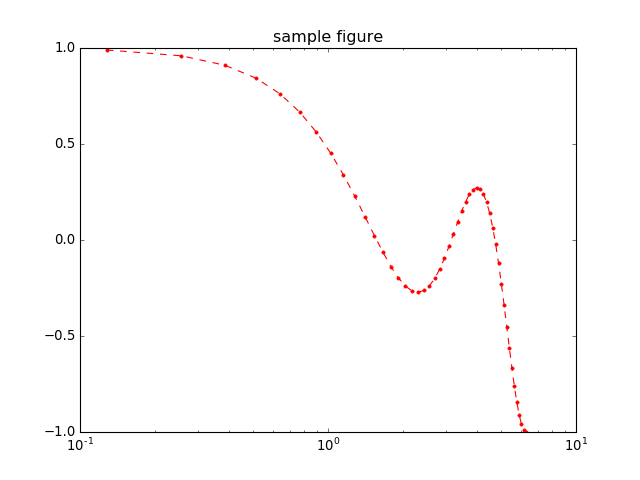

In [72]:
fig, ax = create_base_plot()

# normal-xlog plots
ax.semilogx(x, np.cos(x)*np.cos(x/2), 'r--.')

In [37]:
# clear the plot and plot a function using the y axis in log scale
ax.clear()
ax.semilogy(x, np.exp(x))

In [42]:
# you can (un)set it, whenever you want
#ax.set_yscale('linear')   # change they y axis to linear scale
#ax.set_yscale('log')      # change the y axis to log scale

In [46]:
# you can also make loglog plots
#ax.clear()
#ax.loglog(x, np.exp(x)*np.sin(x))
plt.setp(ax, **dict(yscale='log', xscale='log'))

[None, None]

This is equivelant to:

    ax.plot(x, np.exp(x)*np.sin(x))
    plt.setp(ax, 'yscale', 'log', 'xscale', 'log')

here we have introduced a new method of setting property values via **pyplot.setp**.

setp takes as first argument a matplotlib object. Each pair of positional argument
after that is treated as a key value pair for the set method name and its value. For
example:

   ax.set_scale('linear')
   
becomes

   plt.setp(ax, 'scale', 'linear')
   
This is useful if you need to set lots of properties, such as:

In [67]:
plt.setp(ax, 'xscale', 'linear', 'xlim', [1, 5], 'ylim', [0.1, 10], 'xlabel', 'x',
         'ylabel', 'y', 'title', 'foo',
         'xticks', [1, 2, 3, 4, 5],
         'yticks', [0.1, 1, 10],
         'yticklabels', ['low', 'medium', 'high'])

[None,
 1,
 5,
 0.1,
 10,

## Histograms

<IPython.core.display.Javascript object>


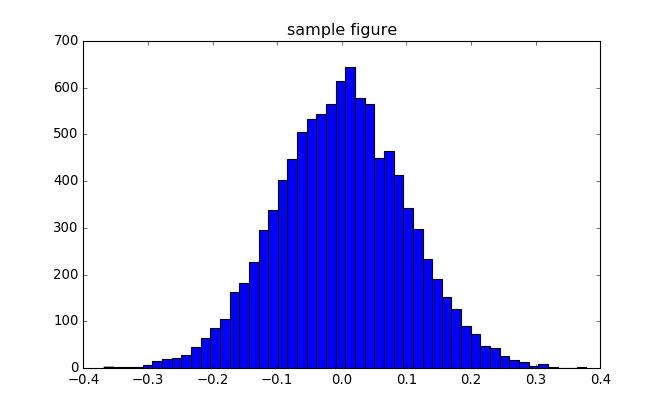

In [69]:
fig1, ax = create_base_plot()
n, bins, patches = ax.hist(np.random.normal(0, 0.1, 10000), bins=50)

## Subplots

Making subplots is relatively easy. Just pass the shape of the grid of plots to plt.subplots() that was used in the above examples.

<IPython.core.display.Javascript object>


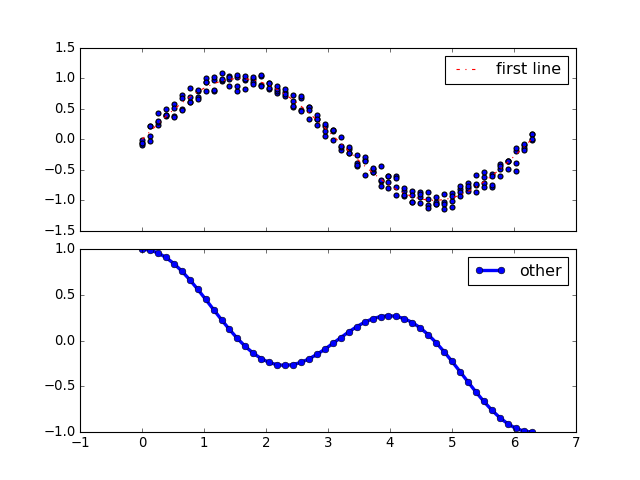

In [73]:
# Create one figure with two plots/axes, with their xaxis shared
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.plot(x, np.sin(x), '-.', color='r', label='first line')
other = ax2.plot(x, np.cos(x)*np.cos(x/2), 'o-', linewidth=3, label='other')
ax1.legend()
ax2.legend()

In [78]:
# adjust the spacing between the axes
fig.subplots_adjust(hspace=0.1)

In [82]:
# add a scatter plot to the first axis
ax1.scatter(x, np.sin(x)+np.random.normal(0, 0.1, np.size(x)))

create a 3x3 grid of plots

<IPython.core.display.Javascript object>


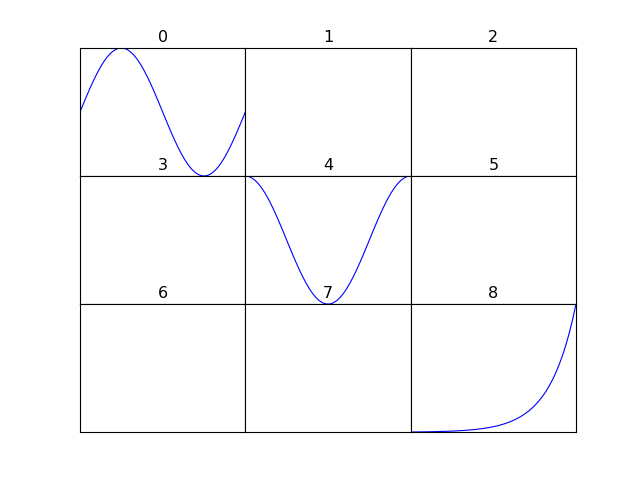

In [105]:
fig, axs = plt.subplots(3, 3)

In [99]:
print(axs.shape)

(3, 3)


In [106]:
# add an index to all the subplots
for ax_index, ax in enumerate(axs.flatten()):
    ax.set_title(ax_index)

In [109]:
# remove all ticks
for ax in axs.flatten():
    plt.setp(ax, 'xticks', [], 'yticks', [])

In [114]:
fig.subplots_adjust(hspace=0, wspace=0)

In [118]:
# plot a curve in the diagonal subplots
for ax, func in zip(axs.diagonal(), [np.sin, np.cos, np.exp]):
    ax.plot(x, func(x))

## Images and contours

In [ ]:
img = np.random.normal(0,0.1, 256*256).reshape(256,256)

In [ ]:
plt.close('all')
fig1, ax = plt.subplots()
imgplot = ax.imshow(img, origin='lower', interpolation='None') # to have 0,0 in the lower left corner and no interpolation
ax.grid()                                # to add a grid to any axis

In [ ]:
imgplot.set_cmap('hot')                # changing the colormap
plt.show()

In [ ]:
imgplot.set_cmap('spectral')            # changing the colormap
colorb = fig1.colorbar(imgplot)         # adding a color bar
plt.show()

In [ ]:
imgplot.set_clim(-0.5, 0.5)            # changing the dynamical range
plt.show()

## Animation

## Styles

## Seaborn

## D3

## Other honerable mentions
   
   - Mayavi: http://code.enthought.com/projects/mayavi/
   - plotly: https://plot.ly/
   - bokeh: http://bokeh.pydata.org/en/latest/
   - pygal: http://www.pygal.org/en/latest/